## Task 1: Load and Explore the Dataset

In [48]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

##### Loading dataset 

In [49]:
df = pd.read_csv("C:/Users/nyong/Project/PLP/task/plp_task/Python/medical_insurance.csv")
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


#### Objective
The objective of this project is to analyze a  medical insurance Dataset  , clean and  preprocess the data, and provide useful insight to enable insurance company make inform decisions. 

#### About Dataset
This dataset provides information about 100,000 individuals including their demographics, socioeconomic status, health conditions, lifestyle factors, insurance plans, and medical expenditures.

1. Demographics & Socioeconomic:
person_id, age, sex, region, urban_rural, income, education, marital_status, employment_status, household_size, dependents

2. Lifestyle & Habits:
bmi, smoker, alcohol_freq, exercise_frequency, sleep_hours, stress_level

3. Health & Clinical:
hypertension, diabetes, copd, cardiovascular, cancer_history, kidney_disease, liver_disease, arthritis, mental_health, chronic_count, systolic_bp, diastolic_bp, ldl, hba1c, risk_score, is_high_risk

4. Healthcare Utilization & Procedures:
visits_last_year, hospitalizations_last_3yrs, days_hospitalized_last_3yrs, medication_count, proc_imaging, proc_surgery, proc_psycho, proc_consult_count, proc_lab, had_major

5. Insurance & Policy:
plan_type, network_tier, deductible, copay, policy_term_years, policy_changes_last_2yrs, provider_quality

6. Medical Costs & Claims:
annual_medical_cost, annual_premium, monthly_premium, claims_count, avg_claim_amount, total_claims_paid

#### Exploratory Data Analytics (EDA)

In [50]:

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

#### Data Cleaning

In [51]:
df_clean = df

In [52]:
# Replacing NaNs with the most frequent occurring value (mode)
most_frequent_alcohol_freq = df_clean['alcohol_freq'].mode(dropna=True)[0]
df_clean['alcohol_freq'] = df_clean['alcohol_freq'].fillna(most_frequent_alcohol_freq)

In [53]:
df_clean.isnull().sum()

person_id                      0
age                            0
sex                            0
region                         0
urban_rural                    0
income                         0
education                      0
marital_status                 0
employment_status              0
household_size                 0
dependents                     0
bmi                            0
smoker                         0
alcohol_freq                   0
visits_last_year               0
hospitalizations_last_3yrs     0
days_hospitalized_last_3yrs    0
medication_count               0
systolic_bp                    0
diastolic_bp                   0
ldl                            0
hba1c                          0
plan_type                      0
network_tier                   0
deductible                     0
copay                          0
policy_term_years              0
policy_changes_last_2yrs       0
provider_quality               0
risk_score                     0
annual_med

## Task 2: Basic Data Analysis

In [54]:
df_clean.describe()

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [55]:
df_clean.describe(include='object')

,sex,region,urban_rural,education,marital_status,employment_status,smoker,alcohol_freq,plan_type,network_tier
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,3,5,3,6,4,4,3,3,4,4
top,Female,South,Urban,Bachelors,Married,Employed,Never,Occasional,PPO,Silver
freq,49193,28029,60019,27996,53252,55269,69709,75161,35167,40177


In [56]:
# Group by income, household_size, and dependents to analyze patterns
grouped_analysis = df_clean.groupby(['income', 'household_size', 'dependents']).agg({
    'age': 'mean',
    'annual_medical_cost': ['mean', 'sum']
}).round(2)

grouped_analysis.head(10)

age annual_medical_cost         
                                  mean                mean      sum
income household_size dependents                                   
1100.0 3              1           34.0             4302.65  8605.30
       5              4           86.0             2457.07  2457.07
1400.0 3              1           32.0             1386.75  1386.75
1500.0 4              2           52.0             1340.37  1340.37
1600.0 2              1           43.0             1580.54  1580.54
       3              1           44.0             1591.27  1591.27
1700.0 1              0            0.0             1174.46  1174.46
       2              0           70.0             3481.32  3481.32
       3              1           33.0             1101.53  2203.05
       4              2           36.0             2940.96  2940.96

## Task 3: Data Visualization

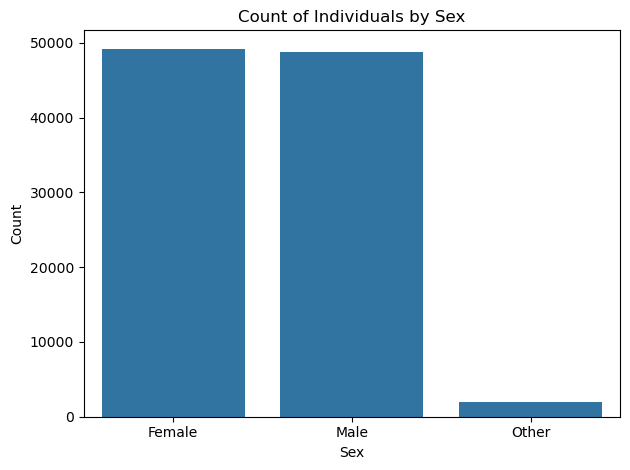

In [57]:
# Count plot for categorical variable 'sex'
sns.countplot(x='sex', data=df_clean)
plt.title('Count of Individuals by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

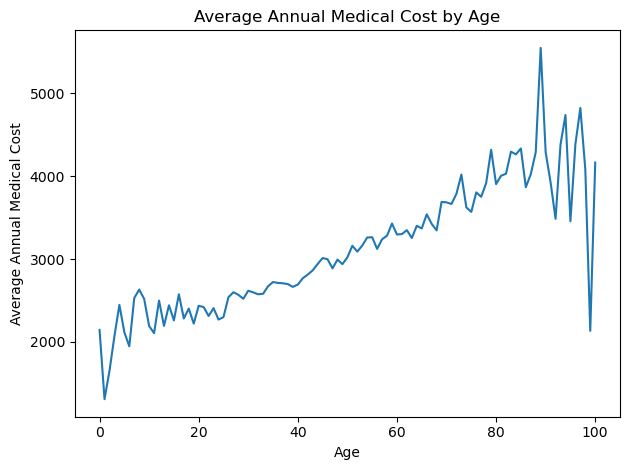

In [58]:
# Line plot: Average annual medical cost by age
avg_cost_by_age = df_clean.groupby('age', as_index=False)['annual_medical_cost'].mean()
sns.lineplot(data=avg_cost_by_age, x='age', y='annual_medical_cost')
plt.title('Average Annual Medical Cost by Age')
plt.xlabel('Age')
plt.ylabel('Average Annual Medical Cost')
plt.tight_layout()
plt.show()

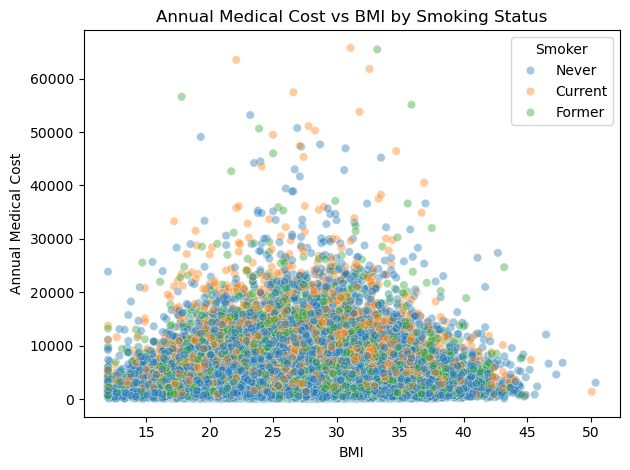

In [59]:
# Scatter plot: Annual medical cost vs BMI, colored by smoker status
sns.scatterplot(data=df_clean, x='bmi', y='annual_medical_cost', hue='smoker', alpha=0.4)
plt.title('Annual Medical Cost vs BMI by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Annual Medical Cost')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

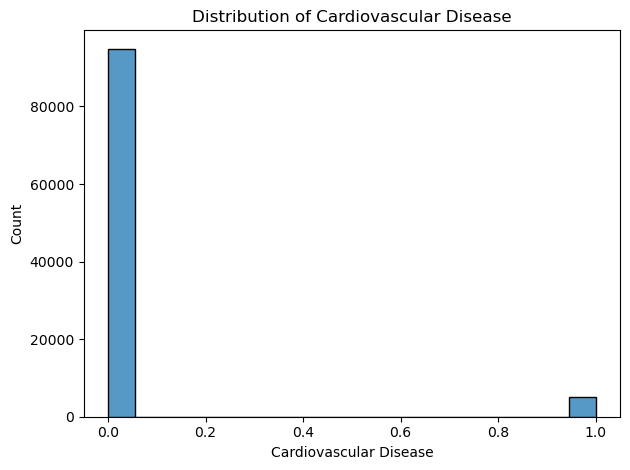

In [60]:
# Histogram: Cardiovascular disease distribution
sns.histplot(data=df_clean, x='cardiovascular_disease', stat='count')
plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()